In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

In [ ]:
# Prompt user to upload the Excel file
from google.colab import files
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_excel(file_name)


Saving Anly project  merged dataset.xlsx to Anly project  merged dataset (1).xlsx


In [ ]:
# Check for null values and data types
print("Checking for null values:")
print(data.isnull().sum())
print("\nData types:")
print(data.dtypes)

Checking for null values:
Stock Name    0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Data types:
Stock Name            object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object


In [ ]:
# Display descriptive statistics for each stock
print("\nDescriptive statistics:")
stock_names = data['Stock Name'].unique()  # Identify unique stock names
for stock in stock_names:
    print(f"\nStatistics for {stock}:")
    print(data[data['Stock Name'] == stock].describe())


Descriptive statistics:

Statistics for Apple:
                                Date   Close/Last        Volume         Open  \
count                           2517  2517.000000  2.517000e+03  2517.000000   
mean   2019-11-13 03:51:42.264600576    93.531676  1.187606e+08    93.457654   
min              2014-11-12 00:00:00    22.585000  2.404834e+07    22.500000   
25%              2017-05-15 00:00:00    36.252500  7.291351e+07    36.132500   
50%              2019-11-12 00:00:00    61.720000  1.016731e+08    61.846200   
75%              2022-05-12 00:00:00   150.590000  1.447486e+08   150.090000   
max              2024-11-12 00:00:00   236.480000  6.475300e+08   236.480000   
std                              NaN    63.481969  6.846649e+07    63.428732   

              High          Low  
count  2517.000000  2517.000000  
mean     94.453619    92.519774  
min      22.917500    22.367500  
25%      36.487500    35.915000  
50%      63.210000    60.652500  
75%     151.570000   148.61

In [ ]:
# Group data by week and calculate weekly average stock value
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
weekly_data = data.groupby(['Stock Name', pd.Grouper(freq='W')])['Close/Last'].mean().reset_index()
weekly_data

,Stock Name,Date,Close/Last
0,Apple,2014-11-16,28.1875
1,Apple,2014-11-23,28.8455
2,Apple,2014-11-30,29.6347
3,Apple,2014-12-07,28.8060
4,Apple,2014-12-14,27.9910
...,...,...,...
2610,Tesla,2024-10-20,220.3300
2611,Tesla,2024-10-27,236.0280
2612,Tesla,2024-11-03,255.6820
2613,Tesla,2024-11-10,280.1880


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will

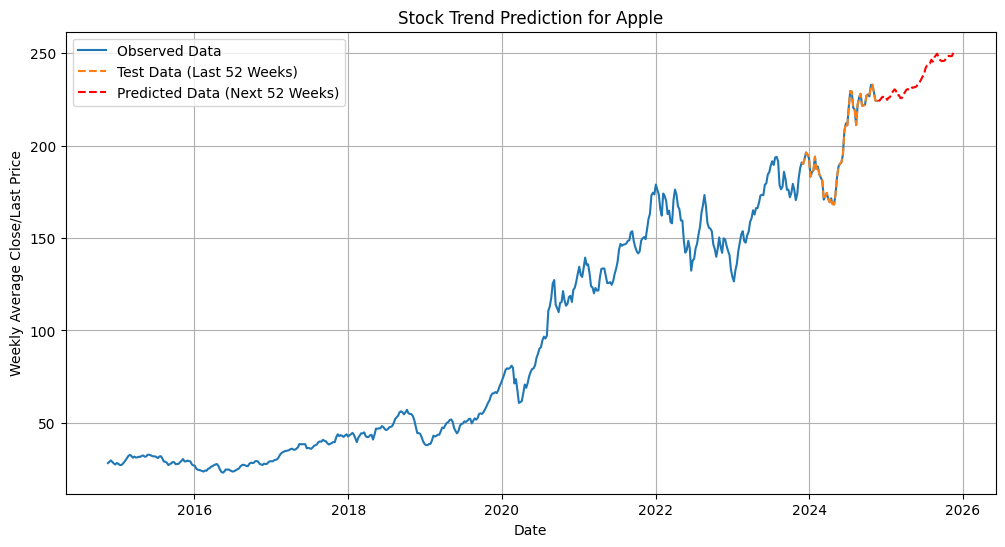


Metrics for Apple:
MAE: 3.4206615506385085
MSE: 19.344551028891477
RMSE: 4.398244084733301
MAPE: 1.716546267582668%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will

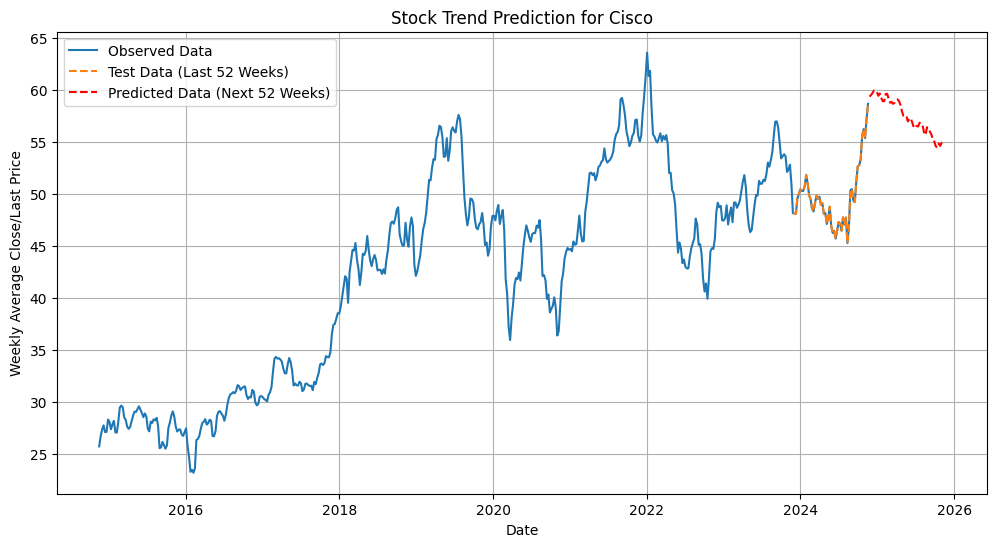


Metrics for Cisco:
MAE: 0.8891590662004842
MSE: 1.1944008062055405
RMSE: 1.092886456227517
MAPE: 1.7924832908413428%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will

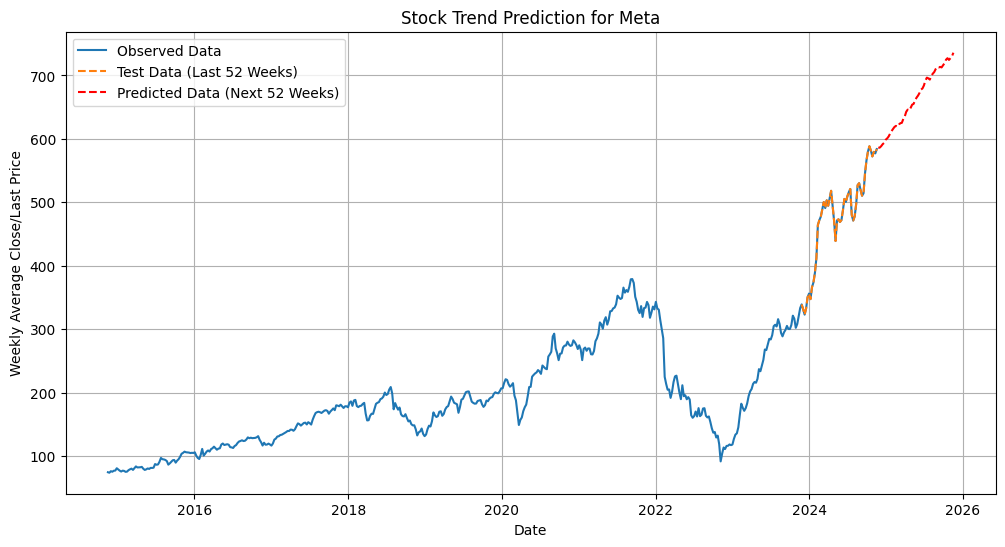


Metrics for Meta:
MAE: 11.458777485337205
MSE: 237.13779825553095
RMSE: 15.399279147269555
MAPE: 2.464489330773451%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will

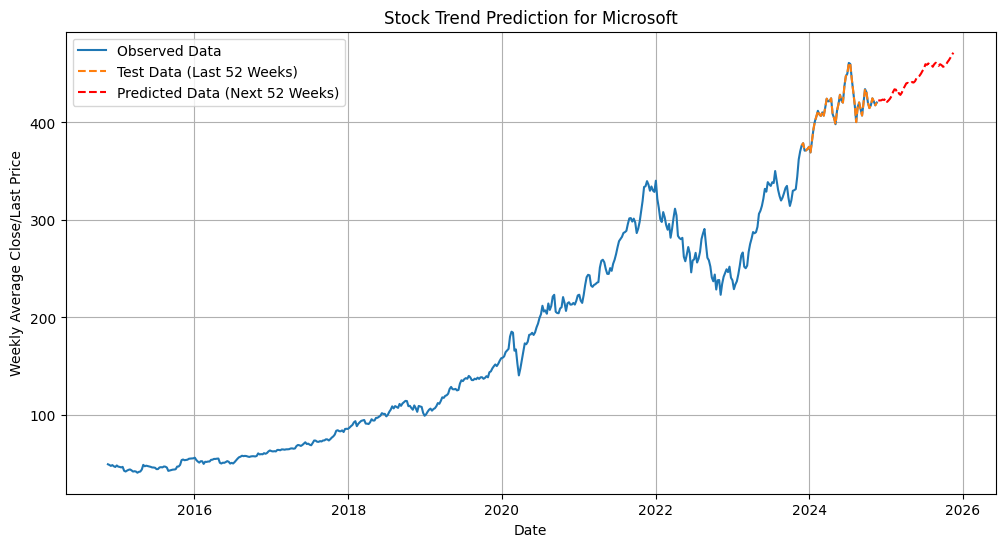


Metrics for Microsoft:
MAE: 5.867870310126852
MSE: 56.31323824531009
RMSE: 7.504214698774955
MAPE: 1.41229107638963%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will

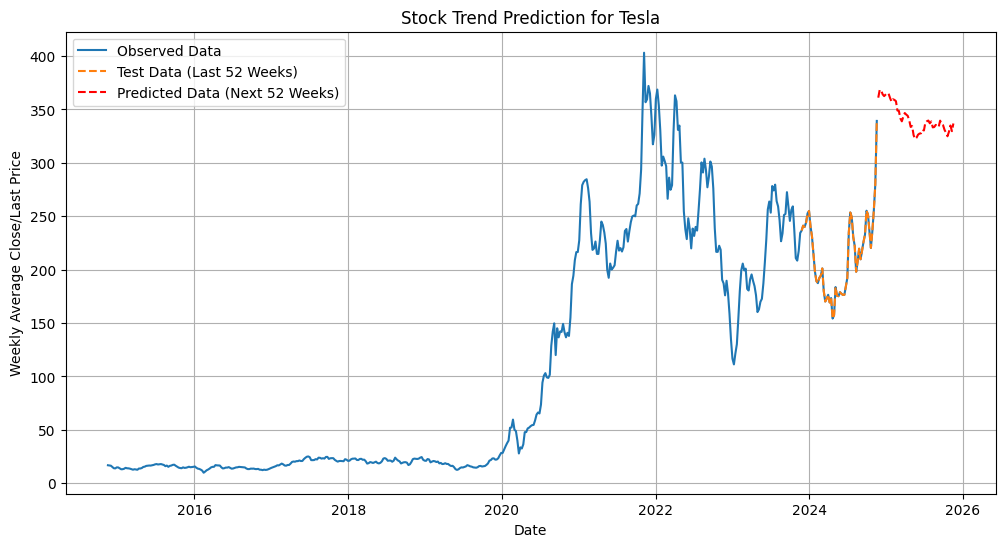


Metrics for Tesla:
MAE: 9.414691648281043
MSE: 153.31898850221768
RMSE: 12.382204508980527
MAPE: 4.319252529820123%


In [ ]:
# Split data into training and testing sets
weekly_data.set_index('Date', inplace=True)
results = {}

for stock in stock_names:
    stock_data = weekly_data[weekly_data['Stock Name'] == stock]
    train = stock_data.iloc[:-52]  # All data except the last 52 weeks for training
    test = stock_data.iloc[-52:]  # Last 52 weeks for testing

    # Prepare historic data for prediction (we will use the 'Close/Last' price for the AR model)
    historic = stock_data['Close/Last']

    # Prediction for the next 52 weeks (1 year)
    n_pred = 52
    date_pred = pd.date_range(test.index[-1] + pd.Timedelta(weeks=1), periods=n_pred, freq='W')

    # Use AR model for prediction
    sel = ar_select_order(historic, 13, glob=True, seasonal=True, old_names=False)
    sel.ar_lags  # Select the AR lags
    model_fit = sel.model.fit()  # Fit AutoReg model using selected lags


    # Predict the next 52 weeks
    pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)

    # Convert predictions to pandas Series with appropriate date index
    predictions = pd.Series(pred.values, index=date_pred)

    # Store results
    results[stock] = {
        "test_actual": test['Close/Last'].values,
        "test_index": test.index,
        "predicted": predictions.values,
        "model": model_fit
    }

    # Plot observed, cross-validated, and predicted trends for each stock
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close/Last'], label='Observed Data')
    plt.plot(test.index, test['Close/Last'], label='Test Data (Last 52 Weeks)', linestyle='--')
    plt.plot(predictions.index, predictions, color='red', label='Predicted Data (Next 52 Weeks)', linestyle='--')
    plt.title(f"Stock Trend Prediction for {stock}")
    plt.xlabel("Date")
    plt.ylabel("Weekly Average Close/Last Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Calculate errors for test data
    test_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
    mae = mean_absolute_error(test['Close/Last'], test_predictions)
    mse = mean_squared_error(test['Close/Last'], test_predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test['Close/Last'] - test_predictions) / test['Close/Last'])) * 100

    # Print error metrics
    print(f"\nMetrics for {stock}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Step 1: Create a dataframe with the predicted stock prices for each stock
predicted_df = pd.DataFrame({stock: results[stock]['predicted'] for stock in stock_names})
predicted_df


,Apple,Cisco,Meta,Microsoft,Tesla
0,224.198835,59.358134,586.075498,422.605237,361.022970
1,224.508462,59.503822,586.277164,422.634250,368.399692
2,225.654022,59.692899,588.599430,422.716776,367.822612
3,226.516282,59.941379,591.719206,423.531514,364.094299
4,225.940168,59.837211,593.740109,423.035490,362.470418
5,226.368291,59.791215,598.593740,424.483730,363.931472
6,224.826795,59.438473,600.667342,421.156283,365.359341
7,225.922400,59.659291,603.674503,422.658338,364.804965
8,226.308324,59.231201,608.129030,424.505853,360.742440
9,228.231170,58.909014,612.226811,427.043031,357.288746


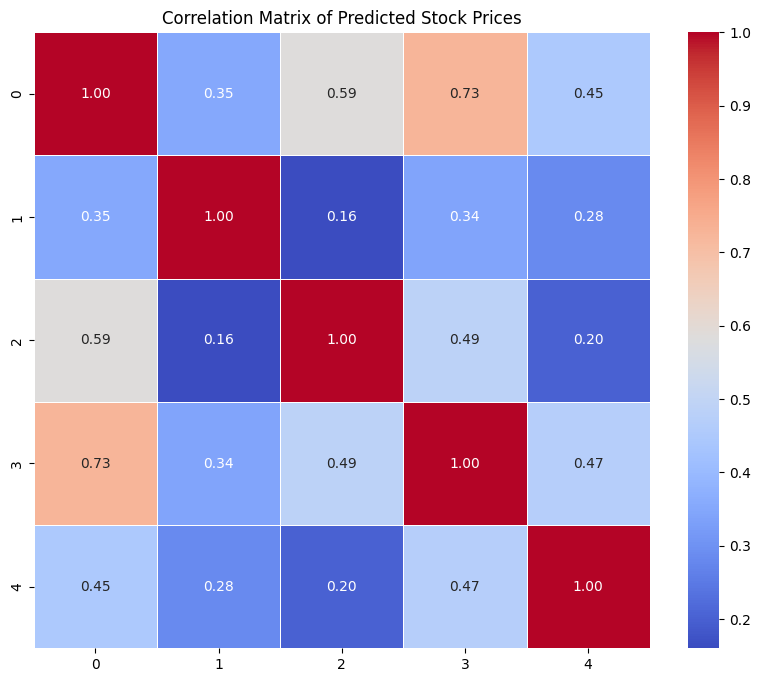

In [ ]:
# Calculate weekly returns based on predicted data in predicted_df
predicted_returns = {}

# Calculate weekly returns (percentage change) for each stock's predicted values
for stock in stock_names:
    predicted_series = predicted_df[stock]

    # Calculate weekly returns (percentage change from one week to the next)
    predicted_returns[stock] = predicted_series.pct_change().dropna() * 100  # In percentage form

# Now, calculate the expected returns based on the predicted data (average of predicted returns)
expected_returns = np.array([predicted_returns[stock].mean() for stock in stock_names])

# Calculate the correlation matrix between the stocks' predicted returns
returns_matrix = np.array([predicted_returns[stock].values for stock in stock_names]).T
correlation_matrix = np.corrcoef(returns_matrix, rowvar=False)
correlation_matrix
#  Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Predicted Stock Prices")
plt.show()

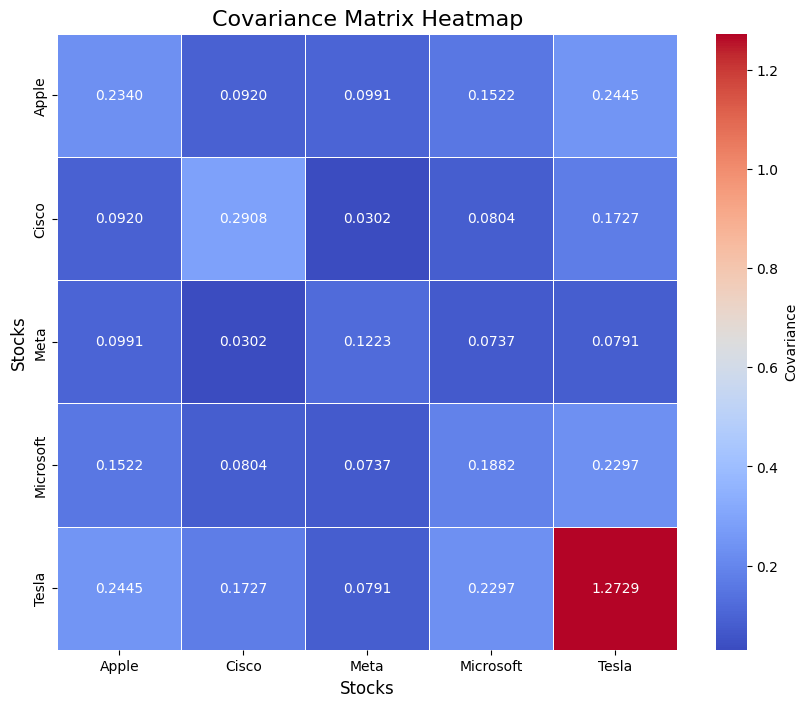

In [ ]:
# Calculate the standard deviations of each stock's predicted returns
std_devs = np.std(returns_matrix, axis=0)

# Now, scale the correlation matrix by the standard deviations to get the covariance matrix
cov_matrix = np.outer(std_devs, std_devs) * correlation_matrix
cov_matrix

# Create a heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.4f', cmap='coolwarm', xticklabels=stock_names, yticklabels=stock_names, cbar_kws={'label': 'Covariance'}, linewidths=0.5)

# Add titles and labels
plt.title("Covariance Matrix Heatmap", fontsize=16)
plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Stocks", fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Function to calculate portfolio return
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

# Function to calculate portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [ ]:
# Define the optimization function (same as before)
def optimize_portfolio(target_return):
    num_stocks = len(expected_returns)

    # Objective: Minimize portfolio variance
    def objective(weights):
        return portfolio_variance(weights, cov_matrix)

    # Constraints: weights sum to 1, portfolio return equals target return
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': lambda weights: portfolio_return(weights, expected_returns) - target_return}  # Return constraint
    )

    # Bounds for weights: each weight must be between 0 and 1
    bounds = [(0, 1) for _ in range(num_stocks)]

    # Initial guess for weights (equal distribution)
    initial_weights = np.array([1 / num_stocks] * num_stocks)

    # Perform optimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [ ]:
# Get user input for target return (in decimal form)
try:
    target_return = float(input("Enter the target portfolio return as a decimal (e.g., 0.02 for 2%): "))

    print(f"Target Portfolio Return (Decimal): {target_return}")

    # Ensure target return is within feasible bounds
    expected_return_min = expected_returns.min()
    expected_return_max = expected_returns.max()

    if not (expected_return_min <= target_return <= expected_return_max):
        print(f"Target return is out of feasible range ({expected_return_min:.4f}, {expected_return_max:.4f}).")
    else:
        # Perform optimization
        optimal_result = optimize_portfolio(target_return)

        if optimal_result.success:
            optimal_weights = optimal_result.x
            print("\nOptimal Weights to Minimize Risk:")
            for stock, weight in zip(stock_names, optimal_weights):
                print(f"{stock}: {weight:.4f}")

            # Calculate and display portfolio variance
            portfolio_risk = portfolio_variance(optimal_weights, cov_matrix)
            print(f"\nPortfolio Variance (Risk): {portfolio_risk:.6f}")
        else:
            print("Optimization failed. Please check your inputs or constraints.")
except ValueError:
    print("Invalid input. Please enter a numeric value for the target return.")

Enter the target portfolio return as a decimal (e.g., 0.02 for 2%): 0
Target Portfolio Return (Decimal): 0.0

Optimal Weights to Minimize Risk:
Apple: 0.0000
Cisco: 0.6214
Meta: 0.0887
Microsoft: 0.2688
Tesla: 0.0211

Portfolio Variance (Risk): 0.168547


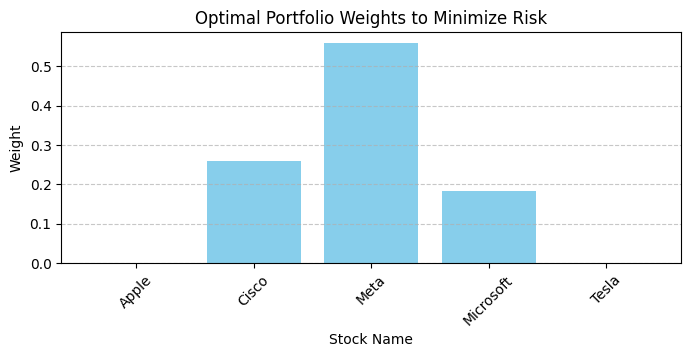

In [ ]:
# After performing the optimization and getting the optimal weights
optimal_weights = optimal_result.x

# Plot the portfolio weights for each stock
plt.figure(figsize=(8, 3))
plt.bar(stock_names, optimal_weights, color='skyblue')
plt.title("Optimal Portfolio Weights to Minimize Risk")
plt.xlabel("Stock Name")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cov_matrix

array([[0.23400939, 0.09203114, 0.09911931, 0.15221626, 0.24447156],
       [0.09203114, 0.29082223, 0.0302262 , 0.08036542, 0.17268273],
       [0.09911931, 0.0302262 , 0.12230756, 0.07372361, 0.07913166],
       [0.15221626, 0.08036542, 0.07372361, 0.18815836, 0.22969336],
       [0.24447156, 0.17268273, 0.07913166, 0.22969336, 1.27294024]])